<a href="https://colab.research.google.com/github/Drynya7/Particle_swarm_optimization/blob/main/particle_swarm_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [4]:
def InputF():
    n = int(input("Степень функции: "))
    K = [0]*(n+1)
    st = ''
    for i in range(n,-1,-1):
        if i == 0: st = st + "K_" + str(i)
        elif i==n: st = st + "K_" + str(i) + "*x^" + str(i) + "+"
        else: st = st + "K_" + str(i) + "*x^" + str(i) + "+"
    print(st)
    for i in range(n+1):
        K[i] = int(input("Введите K_"+str(i)+": "))
    return K

In [5]:
class Agent:
  def __init__(self,K,left_b,right_b,al=0.5,be=0.3,ga=0.3):
    self.V = np.random.random()
    self.al = al
    self.be = be
    self.ga = ga
    self.x = self.P = np.random.uniform(left_b,right_b)
    self.r = 0
    self.e = 0
    self.y = 0
    self.y_P = 0
    self.K = K

  def Check_min_P(self):
    d = len(self.K)
    self.y = 0
    self.y_P = 0
    for i in range(d):
            self.y = self.y + self.K[i]*self.x**i
            self.y_P = self.y_P + self.K[i]*self.P**i
    if self.y<self.y_P:
      self.P = self.x

  def X_edit(self,Z):
    self.r = np.random.random()
    self.e = np.random.random()
    self.V = self.al*self.V + self.be*self.r*(self.P - self.x) + self.ga*self.e*(Z - self.x)
    self.x = self.x + self.V
    self.Check_min_P()

  def R_P(self):
    self.Check_min_P()
    return self.P, self.y_P

In [6]:
def Check_min_Z(K,P,P_mas,Z,y_Z):
    d = len(P_mas)
    for i in range(d):
      if P_mas[i]<y_Z:
        y_Z = P_mas[i]
        Z = P[i]
    return Z, y_Z

In [7]:
def Plt(K,B,E,x_m=None,y_m=None):
    l = abs(B)+abs(E)
    X = list(range(B,E))
    Y = [0]*l
    d = len(K)
    for i in range(l):
        Y[i]=0
        for j in range(d):
            Y[i] = Y[i] + K[j]*X[i]**j
    plt.plot(X,Y,'r--')
    plt.scatter(x_m,y_m)

In [8]:
def PSO(K,k=5,ep=100,left_b=-10,right_b=10):
  Ag = []
  y_P = [0]*k
  P = [0]*5
  y_Z = 1000
  Z = 1000
  for i in range(k):
    Ag.append(Agent(K=K,left_b=left_b,right_b=right_b))
    P[i],y_P[i] = Ag[i].R_P()
  
  while ep!=0:
    ep -= 1
    Z, y_Z = Check_min_Z(K,P,y_P,Z,y_Z)
    for i in range(k):
      Ag[i].X_edit(Z)
      P[i],y_P[i] = Ag[i].R_P()
    Plt(K,left_b,right_b,P,y_P)
  print(Z,y_Z)
  plt.show()



Степень функции: 2
K_2*x^2+K_1*x^1+K_0
Введите K_0: 1
Введите K_1: 1
Введите K_2: 1
-0.4999999965805901 0.75


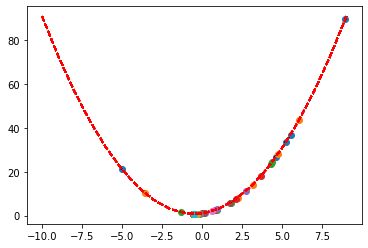

In [9]:
K=InputF()
PSO(K)